<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/Keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)

model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


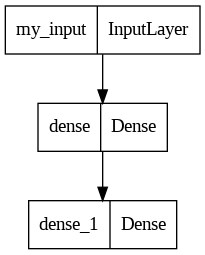

In [6]:
keras.utils.plot_model(model)

In [7]:
inputs.shape

TensorShape([None, 3])

In [8]:
inputs.dtype

tf.float32

In Sequential API we can build models with only one input and one output<br>
(that sucks)<br>
So here functional API can help us

In [10]:
vocab_size = 10_000
num_tags = 100
num_departments = 4

In [12]:
# 3 inputs
title = keras.Input(shape=(vocab_size,), name='title')
text_body = keras.Input(shape=(vocab_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

# hidden layers
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

# 2 outputs
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

# final model build

model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department]
    )

In [13]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',     

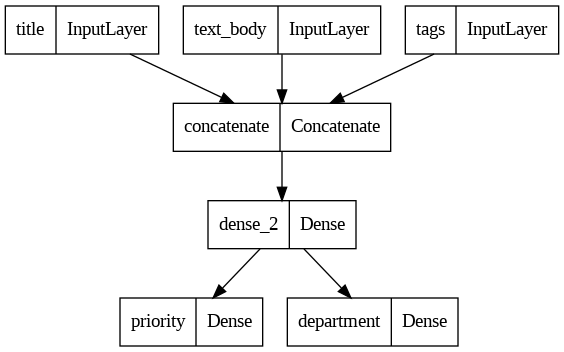

In [14]:
keras.utils.plot_model(model)

In [15]:
# that looks cool😎
# p.s windows 11 emojis are goofy as f💀

In [16]:
import numpy as np

In [17]:
num_samples = 1280

In [18]:
title_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocab_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

In [19]:
priority_data = np.random.random(size=(num_samples, 1))
dep_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [20]:
model.compile(
    optimizer='rmsprop',
    loss=['mse', 'categorical_crossentropy'],
    metrics=['mae', 'accuracy']
)

In [21]:
model.fit([title_data, text_body_data, tags_data],
          [priority_data, dep_data],
          epochs=1)

40/40 [==============================] - 2s 21ms/step - loss: 35.1639 - priority_loss: 0.3298 - department_loss: 34.8342 - priority_mae: 0.4972 - priority_accuracy: 0.0000e+00 - department_mae: 0.5087 - department_accuracy: 0.2367


In [22]:
model.evaluate([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - priority_loss: 0.0000e+00 - department_loss: 0.0000e+00 - priority_mae: 0.0000e+00 - priority_accuracy: 0.0000e+00 - department_mae: 0.0000e+00 - department_accuracy: 0.0000e+00


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [23]:
priority_preds, dep_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 8ms/step


In [27]:
priority_preds[0]

array([1.], dtype=float32)

In [29]:
np.argmax(dep_preds[0])

3

# **TRIPLE BAM**

In [30]:
# we can also use dicts in compiling

In [32]:
model.compile(
    optimizer='rmsprop',
    loss={
        'priority': 'mse',
        'department': 'categorical_crossentropy'
    },
    metrics={
        'priority': 'mae',
        'department': 'accuracy'
    }
)

And in fitting also

In [33]:
model.fit(
    {'title': title_data,
     'text_body': text_body_data,
     'tags': tags_data
     },
    {'priority': priority_data,
     'department': dep_data},
    epochs=1
)

40/40 [==============================] - 2s 22ms/step - loss: 42.0313 - priority_loss: 0.3355 - department_loss: 41.6958 - priority_mae: 0.5043 - department_accuracy: 0.2602


# **GIGA BAM!**

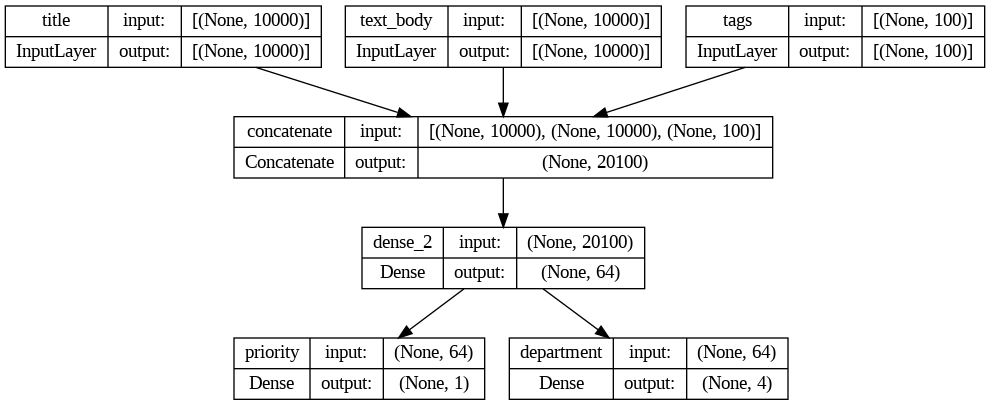

In [34]:
keras.utils.plot_model(model, show_shapes=True)